<a href="https://colab.research.google.com/github/avfka/itmo-ml-labs-2025/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Функции

##1.1

Постройте график функции и её производной первого порядка. Также найдите точки экстремума функции, отметьте их на графике другим цветом. Вычисления проведите вручную и приложите скрин расчетов.

$f(x) = (x^2-2x)ln(x)-1.5x^2+4x$


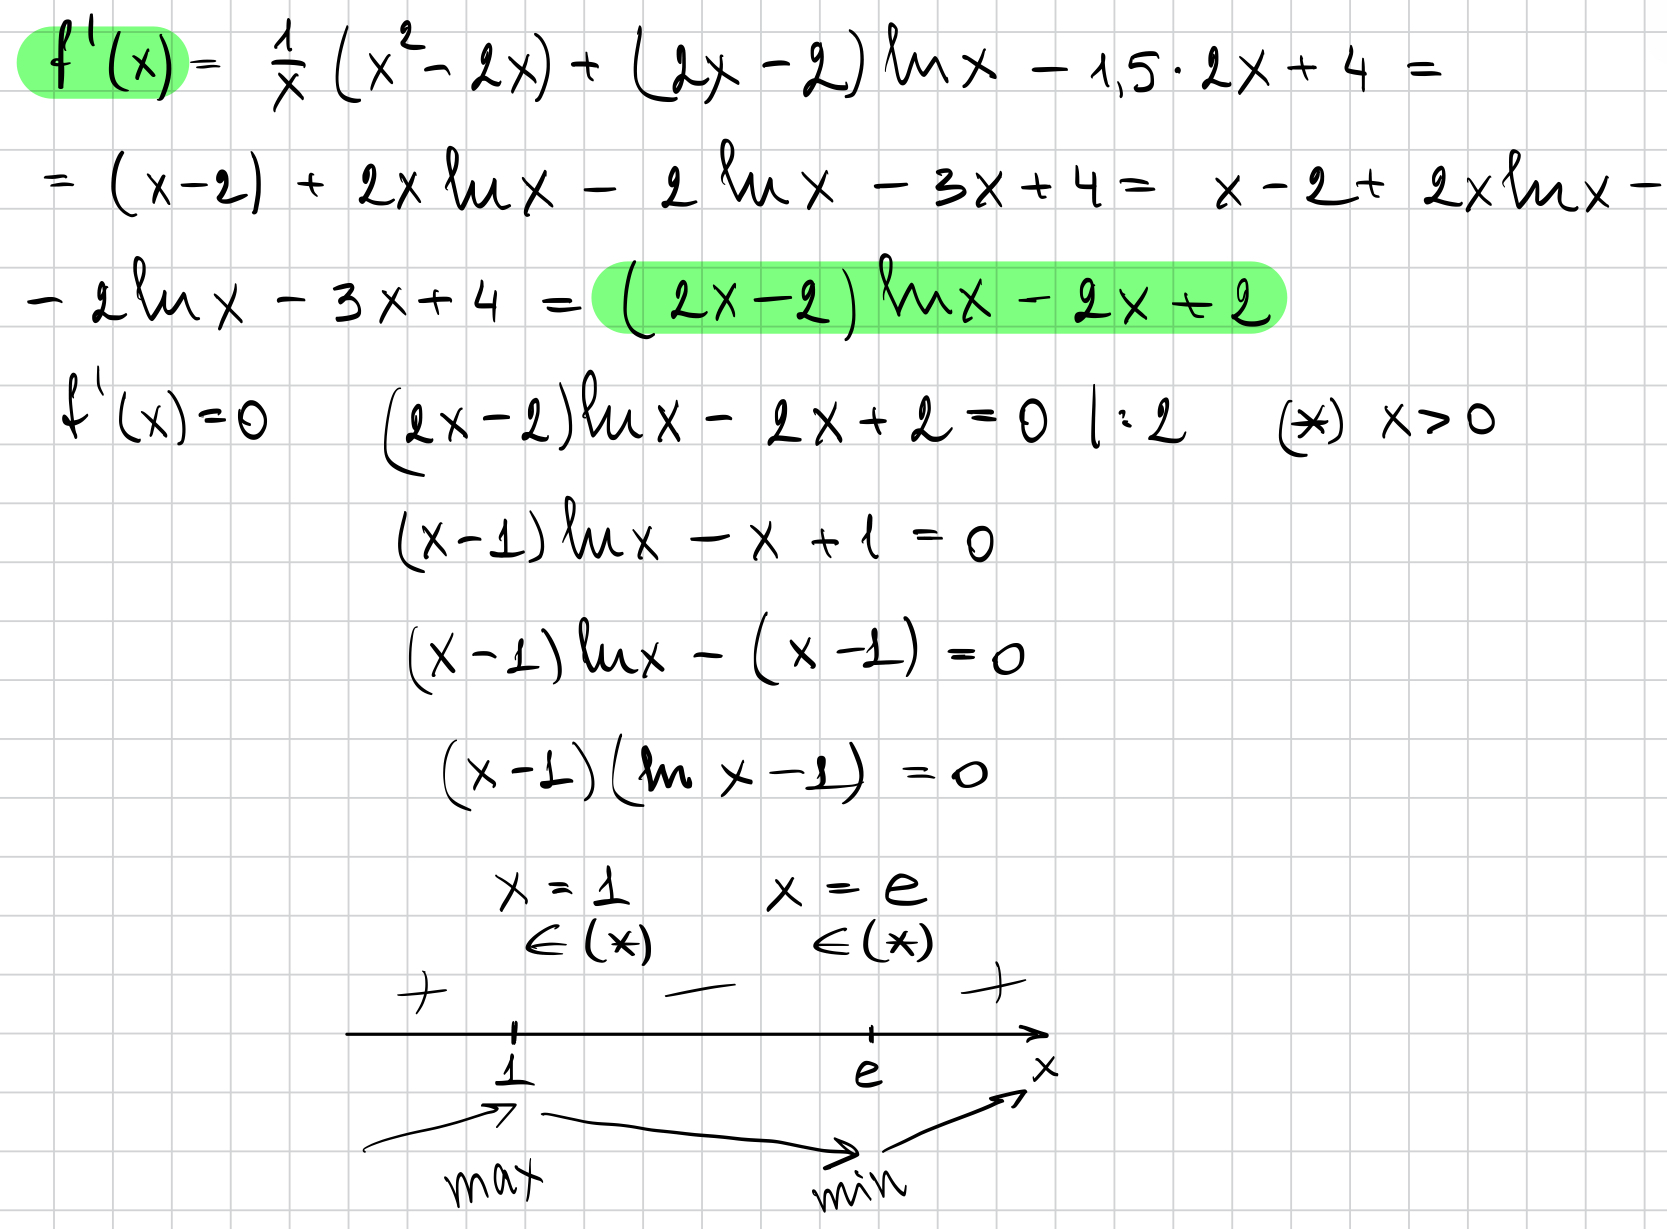

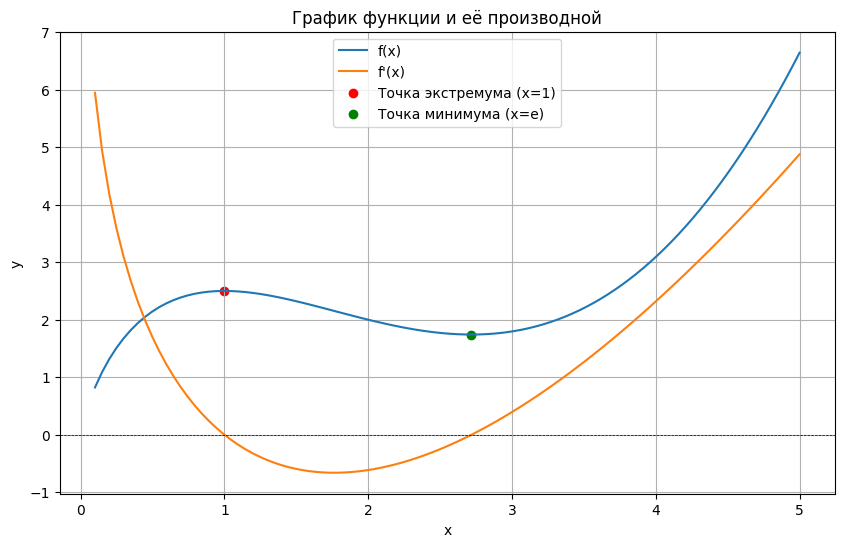

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**2 - 2*x) * np.log(x) - 1.5*x**2 + 4*x

def f_dx(x):
    return (2*x - 2) * np.log(x) + x - 2 - 3*x + 4

x_values = np.linspace(0.1, 5, 100)

y_values = f(x_values)
y_dx_values = f_dx(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)')
plt.plot(x_values, y_dx_values, label="f'(x)")
plt.scatter(1, f(1), color='red', label='Точка экстремума (x=1)')
plt.scatter(np.e, f(np.e), color='green', label='Точка минимума (x=e)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции и её производной')
plt.grid(True)
plt.show()

##1.2

Найдите частные производные функции $f(x, y, z) = 15x^2 + exp(x^2 + y^3)*cos(z)$ с помощью [SymPy](https://www.geeksforgeeks.org/python-sympy-diff-method/)

In [ ]:
from sympy import *

x, y, z = symbols('x y z')
f = 15*x**2 + exp(x**2 + y**3) * cos(z)

# Частные производные
df_dx = diff(f, x)
df_dy = diff(f, y)
df_dz = diff(f, z)

print("Частная производная по x:")
display(df_dx)

print("\nЧастная производная по y:")
display(df_dy)

print("\nЧастная производная по z:")
display(df_dz)

Частная производная по x:


2*x*exp(x**2 + y**3)*cos(z) + 30*x


Частная производная по y:


3*y**2*exp(x**2 + y**3)*cos(z)


Частная производная по z:


-exp(x**2 + y**3)*sin(z)

##2

Не всегда значения функций возможно рассчитать напрямую, однако их можно вычислить приближенно, используя, например, ряды Тейлора. Реализуйте расчет $e^x$. Сравните значения, получаемые с различной точностью приближения (5, 10, 15), с numpy-реализацией. Постройте график, отобразив на нём все четыре линии.

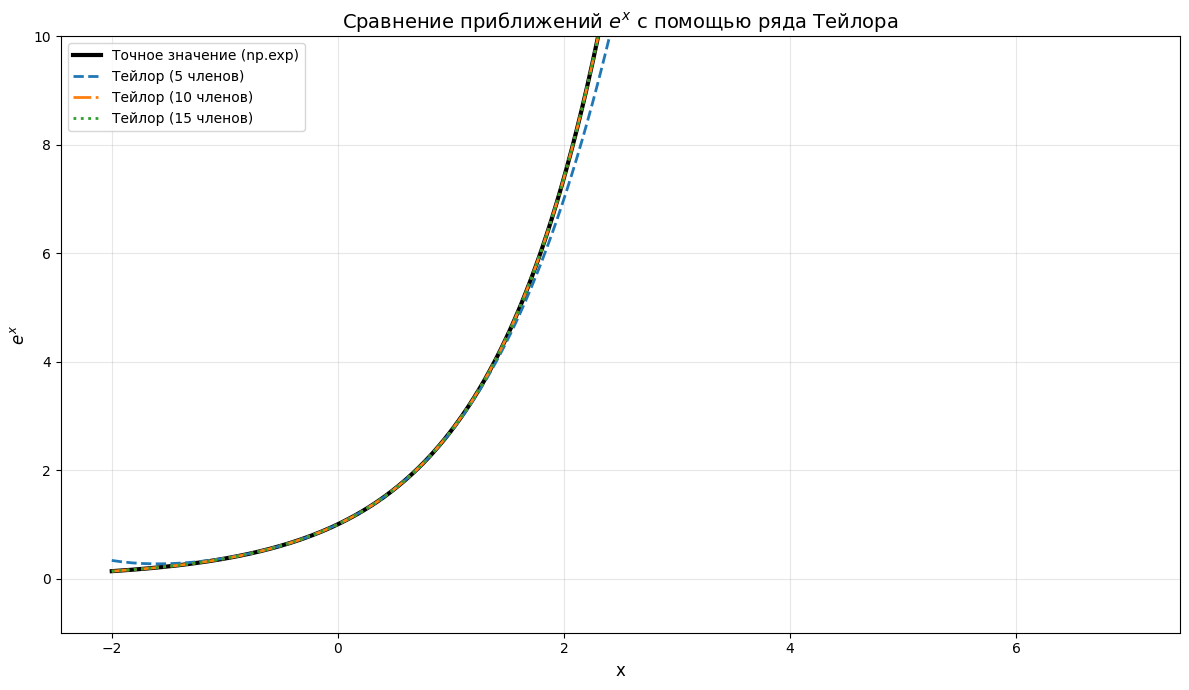

In [ ]:
from math import factorial

def taylor_exp(x, n_terms):
    result = 0.0
    for n in range(n_terms):
        result += x**n / factorial(n)
    return result

# Диапазон значений от -3 до 3
x_values = np.linspace(-2, 7, 200)

exp_taylor_5 = [taylor_exp(x, 5) for x in x_values]
exp_taylor_10 = [taylor_exp(x, 10) for x in x_values]
exp_taylor_15 = [taylor_exp(x, 15) for x in x_values]
exp_numpy = np.exp(x_values)  # Точное значение

plt.figure(figsize=(12, 7))
plt.plot(x_values, exp_numpy, label='Точное значение (np.exp)', linewidth=3, color='black')
plt.plot(x_values, exp_taylor_5, label='Тейлор (5 членов)', linestyle='--', linewidth=2)
plt.plot(x_values, exp_taylor_10, label='Тейлор (10 членов)', linestyle='-.', linewidth=2)
plt.plot(x_values, exp_taylor_15, label='Тейлор (15 членов)', linestyle=':', linewidth=2)

plt.title('Сравнение приближений $e^x$ с помощью ряда Тейлора', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('$e^x$', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(-1, 10)

plt.tight_layout()
plt.show()

Чем больше членов ряда используется, тем ближе приближённое значение к точному.

##3

Рассмотрите две следующие функции, часто использующиеся как функции потерь (то есть они помогают оценить качество предсказаний модели).

$MAE (Mean\ Absolute\ Error) = \frac{1}{n} \sum_{i=1}^{n} |y_i - \widehat{y}_i|$

$MSE (Mean\ Squared\ Error) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{y}_i)^2$

Письменно ответьте на вопросы:

**1. Какая проблема присуща MAE с точки зрения дифференцирования?**

Модуль отклонения не является дифференциируемым в точке 0, так как производная модуля x это 1 или -1.
Следовательно, если машина предскажет результат для какого-то $i$ ($y_i = \widehat{y}_i$), то производной в этой точке не существует. Это может привести к ошибкам при вычислении градиента и неустойчивости процесса оптимизации.
В окрестности точки $y_i = \widehat{y}_i$ производная $MAE$ резко меняется с -1 на +1, это делает оптимизацию менее устойчивой и приводит к тому, что градиентный спуск может "прыгать" вокруг точки минимума, вместо того чтобы плавно сходиться. Это особенно проблематично, если модель часто предсказывает значения, близкие к истинным.


**2. Если в качестве $\widehat{y}_i$ всегда будет предсказываться константное значение, каким оно должно быть, чтобы минимизировать значение каждой из функций?**

$MAE$:\
Чтобы минимизировать $MAE$, нужно выбрать $c$ как медиану значений $y_i$.\
Любое отклонение от медианы увеличивает сумму абсолютных отклонений:\
Если $c$ меньше медианы, то сумма $|y_i - с|$ будет больше, так как больше значений будут находиться справа от $c$.

Если $c$ больше медианы, то сумма также будет больше, так как больше значений будут находиться слева от $c$.

Только когда $c$ равно медиане, сумма достигает минимума.

$MSE$:\
Чтобы минимизировать $MSE$, нужно выбрать
$c$, как среднее арифметическое значений $y_i$. Докажем, посчитав производную $MSE$ по $c$ :\
$(MSE)' = \frac{1}{n} \sum_{i=1}^{n}y_i$



# Матрицы. Векторы

##1

Реализуйте следующие паттерны. Не используйте циклы! Все матрицы квадратные со стороной длины n. Примеры приведены для n=5.

1. Шахматная доска
```
[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]
 ```
2. Полоса шириной 3 относительно главной диагонали
```
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]
 ```
3. Кайма из единиц
```
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]
 ```
4. Полосы
```
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
 ```
5. Верхний треугольник
```
[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]
 ```


In [ ]:
n = 5

# Шахматная доска
chessboard = (np.add.outer(np.arange(n), np.arange(n)) % 2).astype(float)
print("Шахматная доска:")
print(chessboard)

# Полоса шириной 3 относительно главной диагонали
band = np.zeros((n, n), dtype=float)
band[np.abs(np.subtract.outer(np.arange(n), np.arange(n))) <= 1] = 1
print("\nПолоса шириной 3 относительно главной диагонали:")
print(band)

# Кайма из единиц
border = np.ones((n, n), dtype=float)
border[1:-1, 1:-1] = 0
print("\nКайма из единиц:")
print(border)

# Полосы
stripes = np.zeros((n, n), dtype=float)
stripes[1::2, :] = 1
print("\nПолосы:")
print(stripes)

# Верхний треугольник
upper_triangle = np.triu(np.ones((n, n)), k=0).astype(float)
print("\nВерхний треугольник:")
print(upper_triangle)

Шахматная доска:
[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]

Полоса шириной 3 относительно главной диагонали:
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]

Кайма из единиц:
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]

Полосы:
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]

Верхний треугольник:
[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


##2

Пусть дан вектор следующего вида. Преобразуйте его, чтобы получить две матрицы: первая должна содержать одинаковые значения column-wise (столбец целиком из нулей, столбец целиком из единиц и так далее), а вторая - row-wise. Не используйте циклы.

In [ ]:
n = 5
vector = np.hstack([[i for i in range(n)] for _ in range(n)])
print(vector)

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


In [ ]:
matrix_column_wise = vector.reshape(n, n).T

matrix_row_wise = vector.reshape(n, n)

print("\nColumn-wise matrix (столбцы одинаковые):")
print(matrix_column_wise)

print("\nRow-wise matrix (строки одинаковые):")
print(matrix_row_wise)


Column-wise matrix (столбцы одинаковые):
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]

Row-wise matrix (строки одинаковые):
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


# Теория вероятностей

##1

Постройте графики плотности распределений для следующих распределений:

* Биномиальное распределение
* Геометрическое распределение
* Равномерное распределение
* Нормальное распределение
* Логнормальное распределение

Параметры распределений выберите произвольно. Подумайте, какие явления в реальном мире подчиняются тому или иному распределению.

Отобразите также следующие статистические показатели: выборочное среднее, мода, медиана, стандартное отклонение.

In [ ]:
from scipy.stats import *


**Биномиальное распределение**\
Суть - бросок монеты $n$ раз, состояние - $0$ или $1$


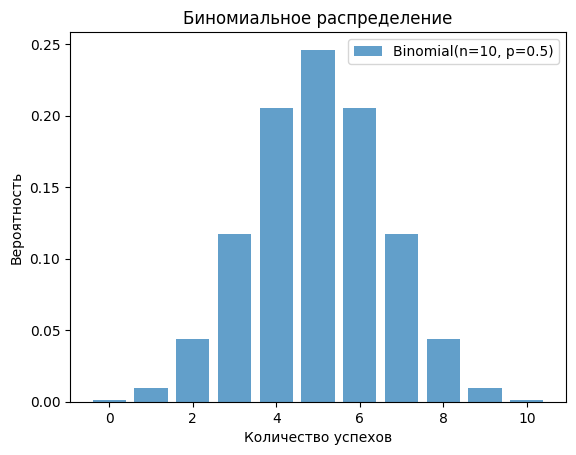

Выборочное среднее: 5.0
Медиана: 5.0
Мода: 5
Стандартное отклонение: 1.5811388300841898


In [ ]:
n = 10
p = 0.5

x = np.arange(0, n + 1)
pmf = binom.pmf(x, n, p)

plt.bar(x, pmf, alpha=0.7, label=f'Binomial(n={n}, p={p})')
plt.title('Биномиальное распределение')
plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

mean = n * p
median = np.median(x)
mode = np.argmax(pmf)
std_dev = np.sqrt(n * p * (1 - p))

print(f"Выборочное среднее: {mean}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Стандартное отклонение: {std_dev}")

**Геометрическое распределение**\
Моделирует количество испытаний до первого успеха в серии независимых испытаний с двумя исходами: успех или неудача. Оно широко используется для анализа процессов, где важно определить, сколько попыток потребуется для достижения первого успеха.

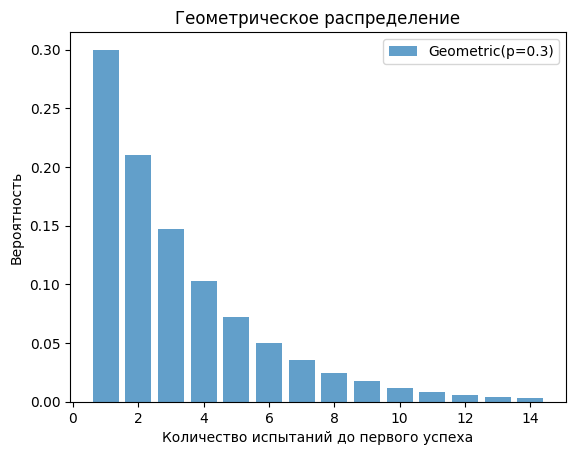

Выборочное среднее: 3.3333333333333335
Медиана: 2.0
Мода: 1
Стандартное отклонение: 2.788866755113585


In [ ]:
p = 0.3

x = np.arange(1, 15)
pmf = geom.pmf(x, p)

plt.bar(x, pmf, alpha=0.7, label=f'Geometric(p={p})')
plt.title('Геометрическое распределение')
plt.xlabel('Количество испытаний до первого успеха')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

mean = 1 / p
median = np.ceil(-1 / np.log2(1 - p))
mode = 1
std_dev = np.sqrt((1 - p) / p**2)

print(f"Выборочное среднее: {mean}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Стандартное отклонение: {std_dev}")

**Равномерное распределение**\
Суть - непрерывное распределение вероятностей, в котором все значения из заданного интервала $[a, b]$ равновероятны. Оно широко используется для моделирования ситуаций, где нет предпочтения к каким-либо конкретным значениям в пределах интервала.

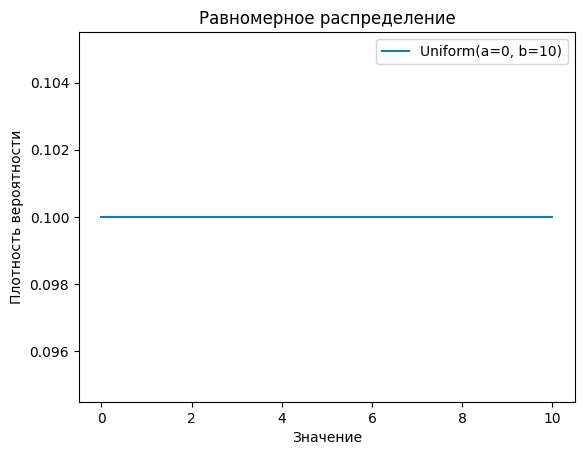

Выборочное среднее: 5.0
Медиана: 5.0
Мода: Любое значение в интервале [a, b]
Стандартное отклонение: 2.886751345948129


In [ ]:
a = 0
b = 10

x = np.linspace(a, b, 1000)
pdf = uniform.pdf(x, a, b - a)

plt.plot(x, pdf, label=f'Uniform(a={a}, b={b})')
plt.title('Равномерное распределение')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

mean = (a + b) / 2
median = mean
mode = "Любое значение в интервале [a, b]"
std_dev = np.sqrt((b - a)**2 / 12)

print(f"Выборочное среднее: {mean}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Стандартное отклонение: {std_dev}")

**Нормальное распределение**\
Моделирует случайные величины, которые группируются вокруг среднего значения

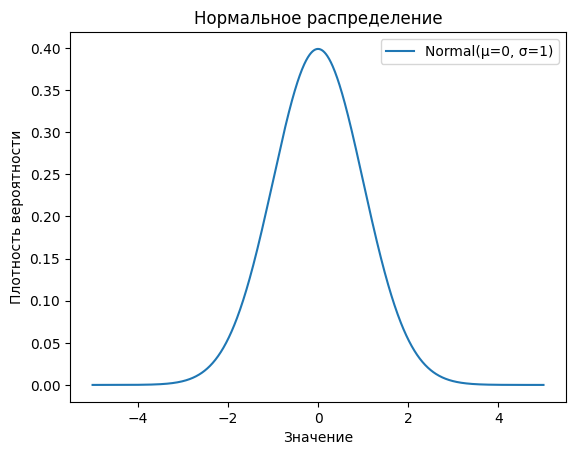

Выборочное среднее: 0
Медиана: 0
Мода: 0
Стандартное отклонение: 1


In [ ]:
mu = 0
sigma = 1

x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, label=f'Normal(μ={mu}, σ={sigma})')
plt.title('Нормальное распределение')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

mean = mu
median = mu
mode = mu
std_dev = sigma

print(f"Выборочное среднее: {mean}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Стандартное отклонение: {std_dev}")

**Логнормальное распределение**\
 Моделирует случайные величины, логарифм которых распределён нормально. Широко используется для описания величин, которые могут принимать только положительные значения и имеют асимметричное распределение.

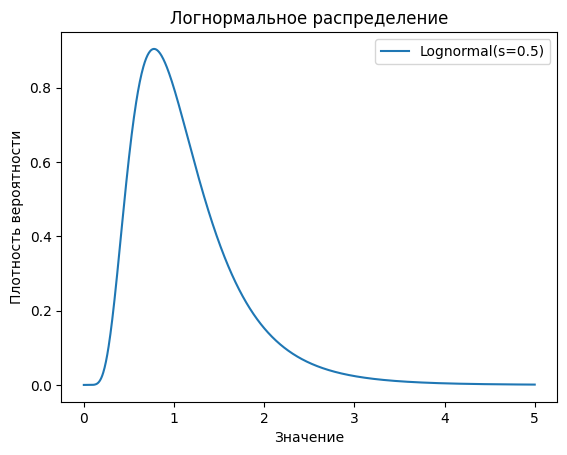

Выборочное среднее: 1.1331484530668263
Медиана: 1
Мода: 0.7788007830714049
Стандартное отклонение: 0.6843089550141415


In [ ]:
s = 0.5
scale = np.exp(0)

x = np.linspace(0, 5, 1000)
pdf = lognorm.pdf(x, s, scale=scale)

plt.plot(x, pdf, label=f'Lognormal(s={s})')
plt.title('Логнормальное распределение')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

mean = np.exp(s**2 / 2)
median = 1
mode = np.exp(-s**2)
std_dev = np.sqrt((np.exp(s**2) - 1)) * np.exp(s**2)

print(f"Выборочное среднее: {mean}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Стандартное отклонение: {std_dev}")

**Подумайте, в каких случаях медиана предпочтительнее среднего при расчете "средней температуры по больнице". Какие модификации можно было бы произвести для формулы среднего или для выборки, чтобы среднее значение стало более репрезентативно в подобных случаях?**\
\
Медиана предпочтительнее среднего в случаях, когда данные содержат выбросы или имеют сильно асимметричное распределение.\
Если в больнице есть несколько пациентов с очень высокой или очень низкой температурой, это может сильно исказить среднее значение.

Например, если у большинства пациентов температура 36.6°C, но у одного пациента температура 40°C, среднее значение будет выше, чем у большинства.

Медиана в этом случае останется близкой к 36.6°C, так как она менее чувствительна к выбросам.

Если распределение температуры сильно смещено в одну сторону (например, много пациентов с низкой температурой и несколько с высокой), среднее значение будет смещено в сторону выбросов.

Медиана лучше отражает типичное значение в таких случаях.

Чтобы среднее значение стало более репрезентативным, можно удалить выбросы статистическими методами, Использовать усечённое среднее, применить взвешенное среднее, использовать логарифмическое преобразование, применить робастные методы.

##2 (2 балла)

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

 Рассчитайте вероятности, а также смоделируйте ситуацию и оцените эмпирическое распределение.

**Рассчет вероятностей**\
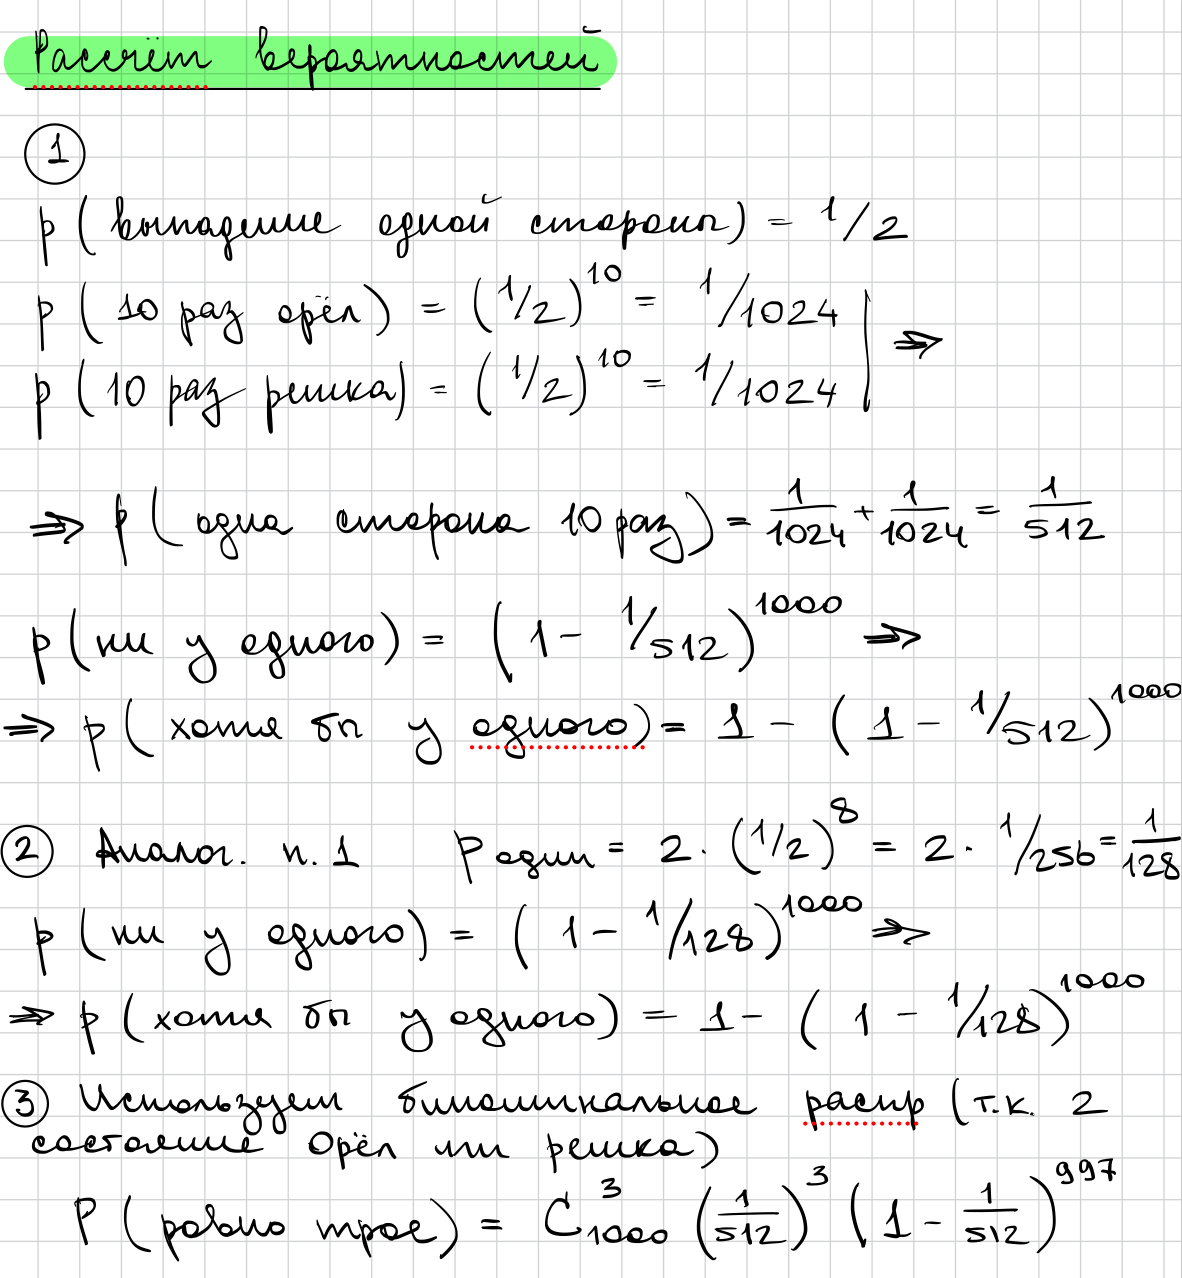

In [ ]:
from math import comb
p_1 = 1 - (511/512)**1000
p_2 = 1 - (127/128)**1000
p_3 = comb(1000, 3)*(1/512)**3*(511/512)**997
print("Вероятность 1:")
print(p_1)
print("Вероятность 2:")
print(p_2)
print("Вероятность 3:")
print(p_3)

Вероятность 1:
0.858440454732242
Вероятность 2:
0.9996075798421896
Вероятность 3:
0.1762873858121736


Сравню полученные значения с моделью:

**Модель ситуации и эмперическое распределение**

In [ ]:
import numpy as np

def simulate_coin_tosses(num_people, num_tosses, target_streak):
    count = 0
    for _ in range(num_people):
        tosses = np.random.choice([0, 1], size=num_tosses)  # 0 — решка, 1 — орёл
        # серии подряд одинаковых результатов
        diff = np.diff(tosses)
        change_indices = np.where(diff != 0)[0]
        if len(change_indices) == 0:
            # все броски одинаковые
            max_streak = num_tosses
        else:
            # длины серий
            streak_lengths = np.diff(np.insert(change_indices, 0, -1))
            max_streak = np.max(streak_lengths)
        if max_streak >= target_streak:
            count += 1
    return count

num_people = 1000
num_tosses = 10
num_simulations = 100

# Симуляция для 10 подряд
results_10 = [simulate_coin_tosses(num_people, num_tosses, 10) for _ in range(num_simulations)]
prob_at_least_one_10 = np.mean(np.array(results_10) >= 1)
prob_exactly_three_10 = np.mean(np.array(results_10) == 3)

# Симуляция для 8 подряд
results_8 = [simulate_coin_tosses(num_people, num_tosses, 8) for _ in range(num_simulations)]
prob_at_least_one_8 = np.mean(np.array(results_8) >= 1)

print(f"Вероятность хотя бы одного человека с 10 подряд: {prob_at_least_one_10:.3f}")
print(f"Вероятность хотя бы одного человека с 8 подряд: {prob_at_least_one_8:.3f}")
print(f"Вероятность ровно трёх человек с 10 подряд: {prob_exactly_three_10:.3f}")

Вероятность хотя бы одного человека с 10 подряд: 0.840
Вероятность хотя бы одного человека с 8 подряд: 1.000
Вероятность ровно трёх человек с 10 подряд: 0.200


**Эмпирическое распределение**

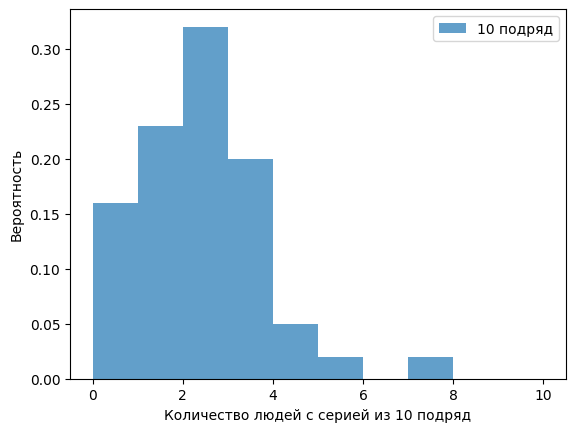

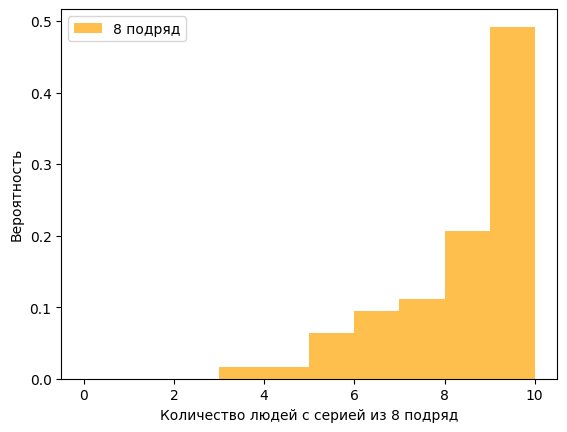

In [ ]:
import matplotlib.pyplot as plt

# Гистограмма для 10 подряд
plt.hist(results_10, bins=range(0, 11), density=True, alpha=0.7, label="10 подряд")
plt.xlabel("Количество людей с серией из 10 подряд")
plt.ylabel("Вероятность")
plt.legend()
plt.show()

# Гистограмма для 8 подряд
plt.hist(results_8, bins=range(0, 11), density=True, alpha=0.7, label="8 подряд", color="orange")
plt.xlabel("Количество людей с серией из 8 подряд")
plt.ylabel("Вероятность")
plt.legend()
plt.show()

##3 (2 балла)

В магазин поступила новая продукция с трех предприятий. Процентный состав этой продукции следующий: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта. Если известно, что купленная продукция высшего сорта, какова вероятность, что она была куплена на втором предприятии?

Решите задачу в общем случае для N предприятий, где доля продукции каждого составляет $a_i$, а доля продукции высшего сорта на каждом составляет $b_i$. Напишите функцию, принимающую на вход два списка: a и b, а также n - номер предприятия, для которого необходимо узнать вероятность, что продукция высшего сорта была куплена именно на нём (нумерация с единицы). Функция должна возвращать две вероятности.

**Рассчет вероятности**
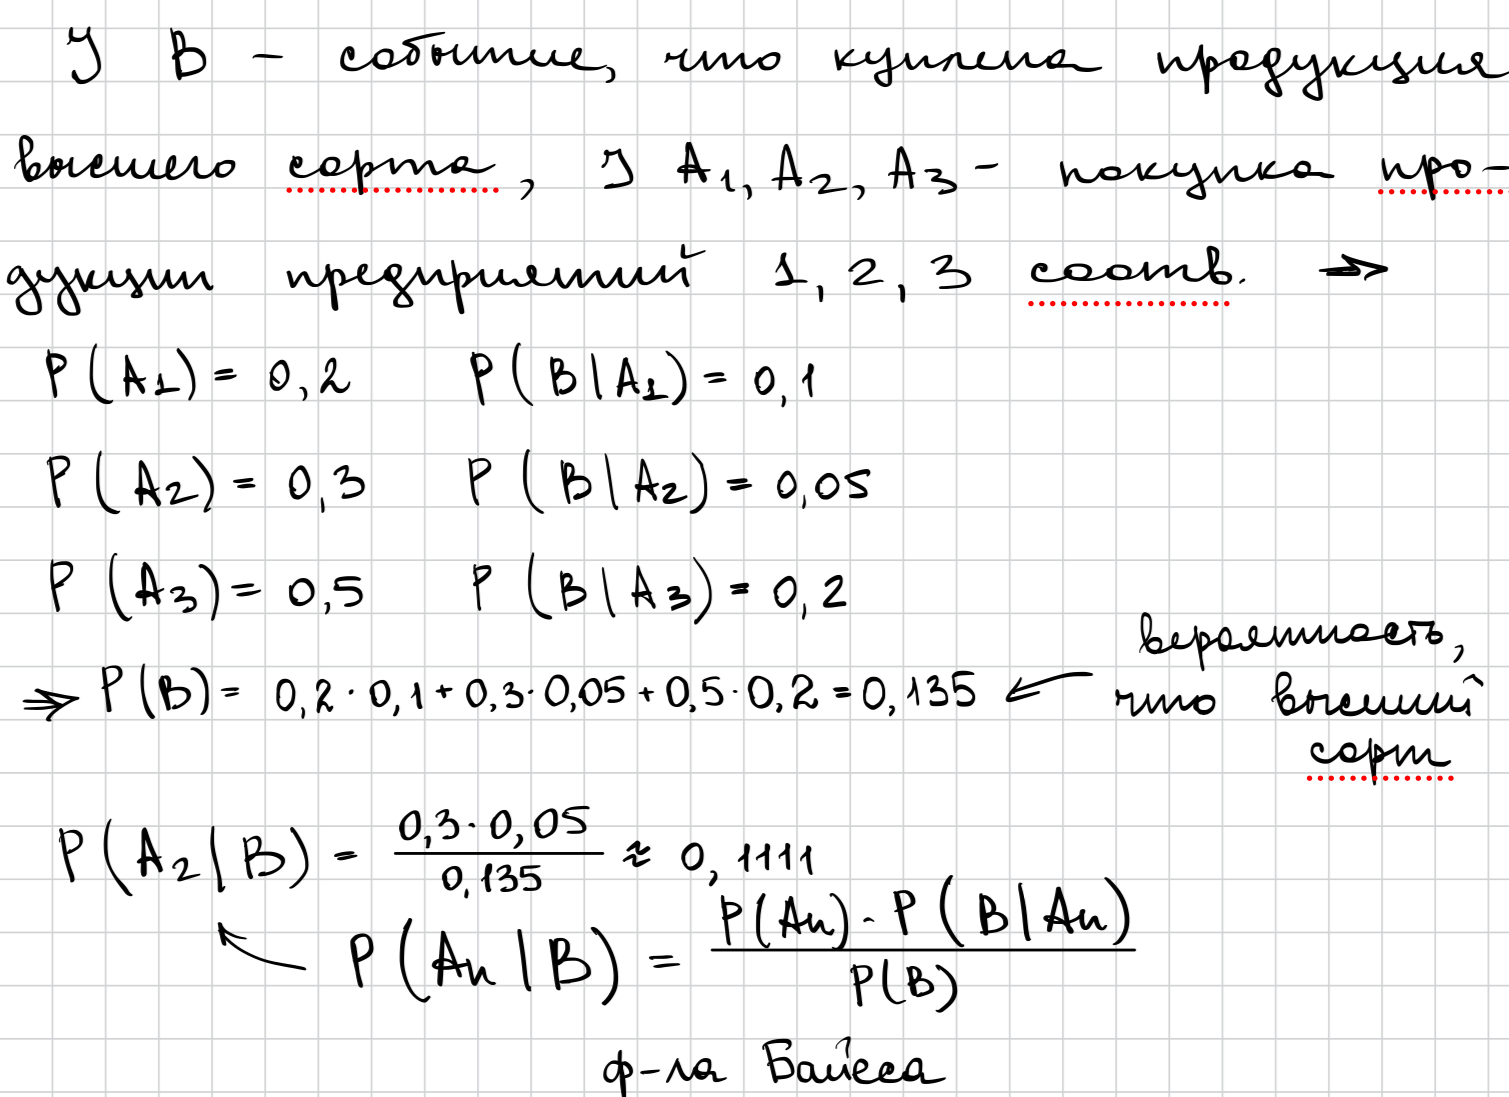

**Решение задачи в общем случае**

In [ ]:
def calculate_probabilities(a, b, n):
    # Проверка входных данных
    if len(a) != len(b):
        raise ValueError("Длины списков a и b должны совпадать.")
    if n < 1 or n > len(a):
        raise ValueError("Номер предприятия n должен быть в диапазоне от 1 до длины списков.")

    # P(B) по формуле полной вероятности
    P_B = sum(a_i * b_i for a_i, b_i in zip(a, b))

    # P(A_n | B) по формуле Байеса
    P_A_n_given_B = (a[n - 1] * b[n - 1]) / P_B

    return P_B, P_A_n_given_B

a = [0.2, 0.3, 0.5]
b = [0.1, 0.05, 0.2]
n = 2

P_B, P_A_n_given_B = calculate_probabilities(a, b, n)
print(f"Вероятность того, что продукция высшего сорта: {P_B:.4f}")
print(f"Вероятность того, что продукция высшего сорта произведена на {n}-м предприятии: {P_A_n_given_B:.4f}")

Вероятность того, что продукция высшего сорта: 0.1350
Вероятность того, что продукция высшего сорта произведена на 2-м предприятии: 0.1111


# Методы оптимизации (3 балла)



(Задание взято у Яндекса)

Дана функция $f(x) = (a\sin(x) + b\ln(x))^2 + cx^2$ и файл, содержащий пары (x, f(x)). Необходимо с точностью до трёх знаков после запятой подобрать коэффициенты a, b, c исходной функции. Для решения задачи предлагается использовать градиентный спуск и функцию потерь MSE.

P.S. на предоставленном наборе данных возможно получить MSE < 0.00001, ориентируйтесь на эту цифру.

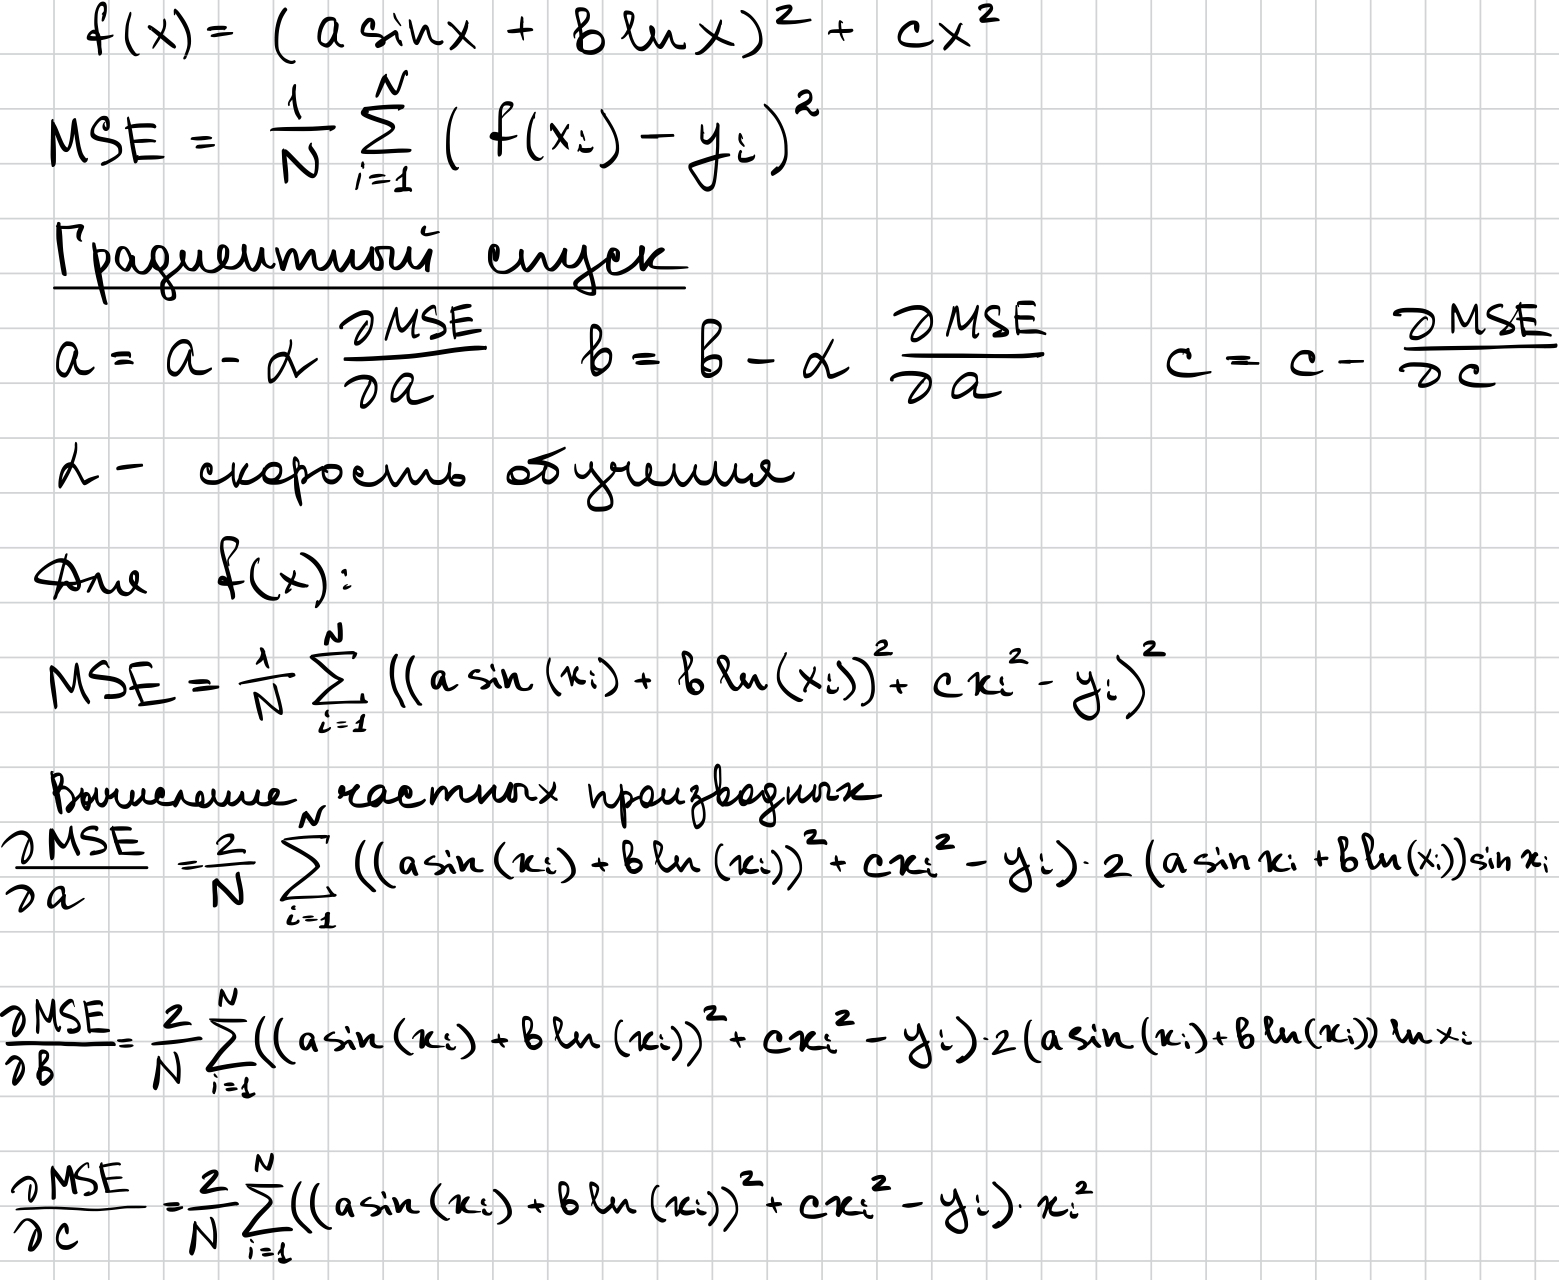

Добавлю реализацию в коде:

In [ ]:
!gdown 1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3

Downloading...
From: https://drive.google.com/uc?id=1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3
To: /content/data.txt
100% 27.0k/27.0k [00:00<00:00, 66.0MB/s]


In [ ]:
with open('data.txt', 'r') as file:
    x_data = []
    y_data = []
    for para in eval(file.read()):
        x_data.append(para[0])
        y_data.append(para[1])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
import numpy as np

x_mean, x_std = np.mean(x_data), np.std(x_data)
x_normalized = (x_data - x_mean) / x_std

np.random.seed(42)
a, b, c = np.random.rand(3) * 0.01

learning_rate = 1e-5
epochs = 100000
target_mse = 1e-3

# Градиентный спуск
for epoch in range(epochs):
    sin_x = np.sin(x_data)
    ln_x = np.log(x_data)
    inner = a * sin_x + b * ln_x
    predictions = inner**2 + c * (x_data**2)

    error = predictions - y_data
    mse = np.mean(error**2)

    # Проверка на остановку
    if mse < target_mse:
        print(f"Достигнуто MSE < {target_mse} на эпохе {epoch}!")
        break

    grad_a = 2 * np.mean((predictions - y_data) * 2 * inner * sin_x)
    grad_b = 2 * np.mean((predictions - y_data) * 2 * inner * ln_x)
    grad_c = 2 * np.mean((predictions - y_data) * (x_data**2))

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c

    # Логирование
    if epoch % 1000 == 0:
        print(f"Эпоха {epoch}, MSE = {mse:.8f}, a = {a:.5f}, b = {b:.5f}, c = {c:.5f}")

print("\nОптимальные коэффициенты:")
print(f"a = {a:.5f}")
print(f"b = {b:.5f}")
print(f"c = {c:.5f}")
print(f"Финальное MSE = {mse:.8f}")

Эпоха 0, MSE = 2067.04875093, a = 0.00374, b = 0.00953, c = 0.01490
Эпоха 1000, MSE = 378.06013632, a = 0.00425, b = 0.06632, c = 3.73918
Эпоха 2000, MSE = 311.67534829, a = 0.02567, b = 0.22948, c = 4.46017
Эпоха 3000, MSE = 287.20707236, a = 0.11050, b = 0.67778, c = 4.58077
Эпоха 4000, MSE = 188.44524077, a = 0.35716, b = 1.62354, c = 4.48504
Эпоха 5000, MSE = 92.23438528, a = 0.82646, b = 2.41580, c = 4.21095
Эпоха 6000, MSE = 53.82156971, a = 1.34832, b = 2.67464, c = 4.02885
Эпоха 7000, MSE = 31.49360410, a = 1.81008, b = 2.74788, c = 3.97581
Эпоха 8000, MSE = 17.18694459, a = 2.18681, b = 2.76502, c = 3.97268
Эпоха 9000, MSE = 8.73622867, a = 2.47629, b = 2.76250, c = 3.98072
Эпоха 10000, MSE = 4.19519447, a = 2.68805, b = 2.75391, c = 3.98825
Эпоха 11000, MSE = 1.93233923, a = 2.83724, b = 2.74476, c = 3.99323
Эпоха 12000, MSE = 0.86449644, a = 2.93958, b = 2.73704, c = 3.99616
Эпоха 13000, MSE = 0.37917714, a = 3.00849, b = 2.73119, c = 3.99779
Эпоха 14000, MSE = 0.16412423, a